In [1]:
import bbi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns

from matplotlib.colors import LogNorm, Normalize


In [4]:
#adapted from
# As input pybbi takes bigWig (bw) file, which is equivalent to bedgraph, but compressed and efficient.
# If you have bedgraph files, you can do conversion from bedgraph to bigWig with kentUtils:
# git clone https://github.com/ENCODE-DCC/kentUtils
#./kentUtils/bin/linux.x86_64/bedGraphToBigWig file.bedgraph chrom.sizes file.bw
# Note that for his conversion you need the chrom.sizes file for your species with chromosomes lengths
# You can download them from: https://github.com/pkerpedjiev/negspy/tree/master/negspy/data


In [33]:
atac1='/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/240424_endsfiles/ens_1bp/Mp.cov_1.s.bw'
atac2='/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/240424_endsfiles/ens_1bp/mGp.cov_1.s.bw'
atac3='/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/240424_endsfiles/ens_1bp/pGp.cov_1.s.bw'

atac1s='/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/240424_endsfiles/ens_1bp/Mp.L120_1.cov.s.bw'
atac2s='/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/240424_endsfiles/ens_1bp/mGp.L120_1.cov.s.bw'
atac3s='/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/240424_endsfiles/ens_1bp/pGp.L120_1.cov.s.bw'

atac1m='/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/240424_endsfiles/ens_1bp/Mp.G150_1.cov.s.bw'
atac2m='/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/240424_endsfiles/ens_1bp/mGp.G150_1.cov.s.bw'
atac3m='/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/240424_endsfiles/ens_1bp/pGp.G150_1.cov.bw'

path1=atac1
path2=atac2
path3=atac3

path4=atac1s
path5=atac2s
path6=atac3s

path7=atac1m
path8=atac2m
path9=atac3m

window = 500 # window size (one-sided)
nbins = 100 # number of bins in the window


# Example for TSS

In [34]:
#table crossed with on genes. NB strands are already flipped
tss=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/RNAseq/RG0-FPKM.at.hg38.refGene.exons.reducedchroms.bed',sep='\t', \
                  names=['chrom','start','end','strand','name','start_Rseq','en_Rseq','Coverage','FPKM','TPM','TSS_start','TSS_end','TSS_start_ext','TSS_end_ext'])
chroms=['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22']
tss=tss[tss['chrom'].isin(chroms)].drop_duplicates(subset=['chrom','start','end'])

tss['FPKM']=tss['FPKM'].astype(float)
tss['TSS_start']=tss['TSS_start'].astype(int)
tss['TSS_end']=tss['TSS_end'].astype(int)
tss['TSS_start_ext']=tss['TSS_start']-5000
tss['TSS_end_ext']=tss['TSS_end']+5000
tss['mid']=(tss['TSS_start']+((tss['TSS_end']-tss['TSS_start'])/2)).astype(int)

tss=tss[tss['FPKM']>1]

sitesf=tss[tss['strand']=='+']
sitesf['mid_shift']=tss['mid']-1000
sitesr=tss[tss['strand']=='-']
sitesr['mid_shift']=tss['mid']+1000

#tss=tss[['chrom','TSS_start','TSS_end','strand','FPKM']]
print(len(sitesf)+len(sitesr),len(tss))
sitesr


11110 11110


/tmp/ipykernel_863902/792823853.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sitesf['mid_shift']=tss['mid']-1000
/tmp/ipykernel_863902/792823853.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sitesr['mid_shift']=tss['mid']+1000


,chrom,start,end,strand,name,start_Rseq,en_Rseq,Coverage,FPKM,TPM,TSS_start,TSS_end,TSS_start_ext,TSS_end_ext,mid,mid_shift
16995,chr13,51767992,51804163,-,DHRS12,51767993,51804163,7.351691,1.000361,2.120352,51804162,51804164,51799162,51809164,51804163,51805163
16996,chr1,148599806,148679764,-,NOTCH2NLB,148599807,148679764,17.153709,1.000406,2.120445,148679763,148679765,148674763,148684765,148679764,148680764
16998,chr13,112967483,112968638,-,MCF2L-AS1,112967484,112968638,17.432043,1.001571,2.122917,112968637,112968639,112963637,112973639,112968638,112969638
17000,chr7,149867693,149873862,-,ATP6V0E2-AS1,149867694,149873862,17.489712,1.004885,2.12994,149873861,149873863,149868861,149878863,149873862,149874862
17003,chr9,90609831,90642824,-,DIRAS2,90609832,90642824,17.528137,1.007093,2.134619,90642823,90642825,90637823,90647825,90642824,90643824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28211,chr17,19190028,19190245,-,SNORD3C,19190029,19190245,83680.953125,4807.953613,10190.870117,19190244,19190246,19185244,19195246,19190245,19191245
28212,chr17,19112419,19112636,-,SNORD3D,19112420,19112636,128503.679688,7383.277344,15649.490234,19112635,19112637,19107635,19117637,19112636,19113636
28213,chr14,20343070,20343411,-,RPPH1,20343071,20343411,133232.234375,7654.960449,16225.344727,20343410,20343412,20338410,20348412,20343411,20344411
28214,chr9,35657750,35658018,-,RMRP,35657751,35658018,352675.84375,20263.261719,42949.722656,35658017,35658019,35653017,35663019,35658018,35659018


# MCD

In [9]:
IDa=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/nativecomps/240314_newIDs/5hr_2X_enrichment.pixel_derived.signal_peaks.bed',sep='\t')
IDa

,chrom,start,end,cluster,size,valency,peak_start,peak_end,size.1
0,chr1,1020000,1030000,0,30000,3,1010000,1040000,30000
1,chr1,1900000,1910000,1,30000,2,1890000,1920000,30000
2,chr1,6600000,6610000,2,30000,2,6590000,6620000,30000
3,chr1,7770000,7780000,3,30000,2,7760000,7790000,30000
4,chr1,7990000,8000000,4,40000,2,7980000,8020000,40000
...,...,...,...,...,...,...,...,...,...
2100,chr22,45170000,45180000,2100,50000,2,45140000,45190000,50000
2101,chr22,46070000,46080000,2101,130000,11,46020000,46150000,130000
2102,chr22,46750000,46760000,2102,30000,2,46740000,46770000,30000
2103,chr22,49940000,49950000,2103,70000,5,49920000,49990000,70000


# TSS at MCD


In [11]:
import bioframe as bf

sites_IDf=bf.overlap(sitesf,IDa,cols1=['chrom','TSS_start_ext','TSS_end_ext'],cols2=['chrom','peak_start','peak_end']).dropna(subset='valency_').drop_duplicates(['chrom','start','end'])
sites_IDr=bf.overlap(sitesr,IDa,cols1=['chrom','TSS_start_ext','TSS_end_ext'],cols2=['chrom','peak_start','peak_end']).dropna(subset='valency_').drop_duplicates(['chrom','start','end'])
sitesf=sites_IDf
sitesr=sites_IDr
print(len(sites_IDf)+len(sites_IDr))
sites_IDf


2795


,chrom,start,end,strand,name,start_Rseq,en_Rseq,Coverage,FPKM,TPM,...,size.1_,chrom_,start_,end_,cluster_,size_,valency_,peak_start_,peak_end_,size.1_
0,chr19,37371098,37393066,+,ZNF527,37371099,37393066,17.427691,1.001321,2.122386,...,30000.0,chr19,37360000,37370000,1998,30000,2,37350000,37380000,30000
1,chr6,31739947,31764847,+,MSH5-SAPCD1,31739948,31764847,17.605137,1.011517,2.143996,...,50000.0,chr6,31730000,31740000,928,50000,6,31710000,31760000,50000
2,chr14,23561096,23568075,+,LOC102724814,23561097,23568075,17.849609,1.025563,2.173769,...,50000.0,chr14,23550000,23560000,1711,50000,8,23530000,23580000,50000
3,chr5,119268758,119399688,+,TNFAIP8,119268759,119399688,1.893057,1.036486,2.196921,...,50000.0,chr5,119280000,119290000,820,50000,2,119260000,119310000,50000
4,chr19,47226941,47227021,+,MIR3190,47226942,47227021,18.11977,1.041085,2.20667,...,40000.0,chr19,47250000,47260000,2009,40000,4,47230000,47270000,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,chr11,809966,812876,+,RPLP2,809967,812876,26734.267578,1536.037842,3255.76416,...,100000.0,chr11,830000,840000,1425,100000,6,760000,860000,100000
1433,chr1,153990754,153992155,+,RPS27,153990755,153992155,17151.001953,1646.211182,3489.285889,...,70000.0,chr1,153960000,153970000,80,70000,18,153930000,154000000,70000
1434,chr6,33272074,33276511,+,RPS18,33272075,33276511,32330.914062,1857.597534,3937.337402,...,90000.0,chr6,33280000,33290000,933,90000,11,33240000,33330000,90000
1435,chr2,84905655,84906671,+,TMSB10,84905656,84906671,36505.265625,2097.438232,4445.699707,...,80000.0,chr2,84930000,84940000,299,80000,9,84890000,84970000,80000


# run forward


In [35]:
sites=sitesf

In [36]:
chroms=sites.chrom
starts=sites.mid-window
ends=sites.mid+window


In [37]:
# Creation of numpy 2D array with annotation snippets
s1 = bbi.stackup(path1, chroms, starts, ends, bins=nbins) 
s1[np.isnan(s1)] = 0
s2 = bbi.stackup(path2, chroms, starts, ends, bins=nbins) 
s2[np.isnan(s2)] = 0
s3 = bbi.stackup(path3, chroms, starts, ends, bins=nbins) 
s3[np.isnan(s3)] = 0

s4 = bbi.stackup(path4, chroms, starts, ends, bins=nbins) 
s4[np.isnan(s4)] = 0
s5 = bbi.stackup(path5, chroms, starts, ends, bins=nbins) 
s5[np.isnan(s5)] = 0
s6 = bbi.stackup(path6, chroms, starts, ends, bins=nbins) 
s6[np.isnan(s6)] = 0

s7 = bbi.stackup(path7, chroms, starts, ends, bins=nbins) 
s7[np.isnan(s7)] = 0
s8 = bbi.stackup(path8, chroms, starts, ends, bins=nbins) 
s8[np.isnan(s8)] = 0
s9 = bbi.stackup(path9, chroms, starts, ends, bins=nbins) 
s9[np.isnan(s9)] = 0



# forward upstream window to normalise

In [38]:
chroms=sites.chrom
starts=sites.mid_shift-window
ends=sites.mid_shift+window


In [39]:
# Creation of numpy 2D array with annotation snippets
s1b = bbi.stackup(path1, chroms, starts, ends, bins=nbins) 
s1b[np.isnan(s1b)] = 0
s2b = bbi.stackup(path2, chroms, starts, ends, bins=nbins) 
s2b[np.isnan(s2b)] = 0
s3b = bbi.stackup(path3, chroms, starts, ends, bins=nbins) 
s3b[np.isnan(s3b)] = 0

s4b = bbi.stackup(path4, chroms, starts, ends, bins=nbins) 
s4b[np.isnan(s4b)] = 0
s5b = bbi.stackup(path5, chroms, starts, ends, bins=nbins) 
s5b[np.isnan(s5b)] = 0
s6b = bbi.stackup(path6, chroms, starts, ends, bins=nbins) 
s6b[np.isnan(s6b)] = 0

s7b = bbi.stackup(path7, chroms, starts, ends, bins=nbins) 
s7b[np.isnan(s7b)] = 0
s8b = bbi.stackup(path8, chroms, starts, ends, bins=nbins) 
s8b[np.isnan(s8b)] = 0
s9b = bbi.stackup(path9, chroms, starts, ends, bins=nbins) 
s9b[np.isnan(s9b)] = 0


In [40]:
s1n=s1/s1b.mean()
s2n=s2/s2b.mean()
s3n=s3/s3b.mean()
s4n=s4/s4b.mean()
s5n=s5/s5b.mean()
s6n=s6/s6b.mean()
s7n=s7/s7b.mean()
s8n=s8/s8b.mean()
s9n=s9/s9b.mean()


In [41]:
# Ordering
for_order1 = s1n[:,8:13].sum(axis=1) # ordering by central values of stack
order1 = np.argsort(for_order1)[::-1]
for_order2 = s2n[:,8:13].sum(axis=1) # ordering by central values of stack
order2 = np.argsort(for_order2)[::-1]
for_order3 = s3n[:,8:13].sum(axis=1) # ordering by central values of stack
order3 = np.argsort(for_order3)[::-1]

for_order4 = s4n[:,8:13].sum(axis=1) # ordering by central values of stack
order4 = np.argsort(for_order4)[::-1]
for_order5 = s5n[:,8:13].sum(axis=1) # ordering by central values of stack
order5 = np.argsort(for_order5)[::-1]
for_order6 = s6n[:,8:13].sum(axis=1) # ordering by central values of stack
order6 = np.argsort(for_order6)[::-1]

for_order7 = s7n[:,8:13].sum(axis=1) # ordering by central values of stack
order7 = np.argsort(for_order7)[::-1]
for_order8 = s8n[:,8:13].sum(axis=1) # ordering by central values of stack
order8 = np.argsort(for_order8)[::-1]
for_order9 = s9n[:,8:13].sum(axis=1) # ordering by central values of stack
order9 = np.argsort(for_order9)[::-1]


In [42]:
s1f=s1n[order1,:].sum(axis=0)/len(s1n)
s2f=s2n[order1,:].sum(axis=0)/len(s2n)
s3f=s3n[order1,:].sum(axis=0)/len(s3n)
s4f=s4n[order1,:].sum(axis=0)/len(s4n)
s5f=s5n[order1,:].sum(axis=0)/len(s5n)
s6f=s6n[order1,:].sum(axis=0)/len(s6n)
s7f=s7n[order1,:].sum(axis=0)/len(s7n)
s8f=s8n[order1,:].sum(axis=0)/len(s8n)
s9f=s9n[order1,:].sum(axis=0)/len(s9n)


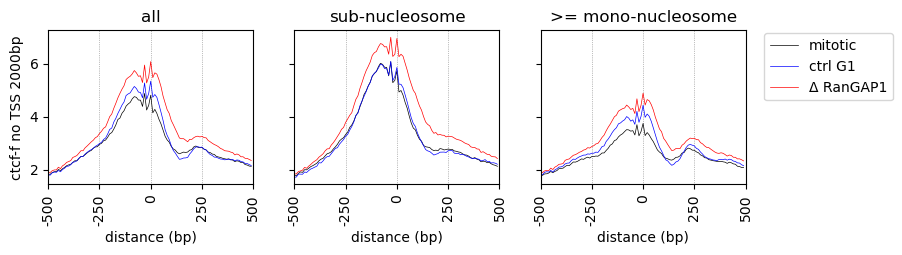

In [43]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(9,2),sharey=True)

ax1.plot(s1f,label='mitotic',color='k',lw=0.5)
ax1.plot(s2f, label = 'ctrl G1',color='blue',lw=0.5)
ax1.plot(s3f,label= 'Δ RanGAP1',color='red',lw=0.5)

ax2.plot(s4f,label='mitotic',color='k',lw=0.5)
ax2.plot(s5f, label = 'ctrl G1',color='blue',lw=0.5)
ax2.plot(s6f,label= 'Δ RanGAP1',color='red',lw=0.5)

ax3.plot(s7f,label='mitotic',color='k',lw=0.5)
ax3.plot(s8f, label = 'ctrl G1',color='blue',lw=0.5)
ax3.plot(s9f,label= 'Δ RanGAP1',color='red',lw=0.5)

for ax in ax1,ax2,ax3:
    #ax.set_yscale('log')
    #ax.set_ylim(0,0.25)
    ax.set_xlim(0,100)
    ax.set_xticks([0,25,50,75,100])
    ax.set_xticklabels([-500,-250,0,250,500],visible=True,rotation=90,ha='center')
    ax.xaxis.set_ticks_position("bottom")
    ax.grid(axis='x',color='grey', linewidth=0.5 , ls=':')
    ax.set_xlabel('distance (bp)')  
    
ax1.set_ylabel('ctcf-f no TSS 2000bp') 
ax1.set_title('all')
ax2.set_title('sub-nucleosome')
ax3.set_title('>= mono-nucleosome')


plt.legend()
ax.legend(bbox_to_anchor=(1.75, 1.025))

#plt.savefig('.pdf',dpi=300,bbox_inches='tight')



# same but reversed

In [44]:
sites=sitesr


In [45]:
chroms=sites.chrom
starts=sites.mid-window
ends=sites.mid+window


In [46]:
# Creation of numpy 2D array with annotation snippets
s1 = bbi.stackup(path1, chroms, starts, ends, bins=nbins) 
s1[np.isnan(s1)] = 0
s2 = bbi.stackup(path2, chroms, starts, ends, bins=nbins) 
s2[np.isnan(s2)] = 0
s3 = bbi.stackup(path3, chroms, starts, ends, bins=nbins) 
s3[np.isnan(s3)] = 0

s4 = bbi.stackup(path4, chroms, starts, ends, bins=nbins) 
s4[np.isnan(s4)] = 0
s5 = bbi.stackup(path5, chroms, starts, ends, bins=nbins) 
s5[np.isnan(s5)] = 0
s6 = bbi.stackup(path6, chroms, starts, ends, bins=nbins) 
s6[np.isnan(s6)] = 0

s7 = bbi.stackup(path7, chroms, starts, ends, bins=nbins) 
s7[np.isnan(s7)] = 0
s8 = bbi.stackup(path8, chroms, starts, ends, bins=nbins) 
s8[np.isnan(s8)] = 0
s9 = bbi.stackup(path9, chroms, starts, ends, bins=nbins) 
s9[np.isnan(s9)] = 0



# upstream window for normalisation

In [47]:
chroms=sites.chrom
starts=sites.mid_shift-window
ends=sites.mid_shift+window


In [48]:
# Creation of numpy 2D array with annotation snippets
s1b = bbi.stackup(path1, chroms, starts, ends, bins=nbins) 
s1b[np.isnan(s1b)] = 0
s2b = bbi.stackup(path2, chroms, starts, ends, bins=nbins) 
s2b[np.isnan(s2b)] = 0
s3b = bbi.stackup(path3, chroms, starts, ends, bins=nbins) 
s3b[np.isnan(s3b)] = 0

s4b = bbi.stackup(path4, chroms, starts, ends, bins=nbins) 
s4b[np.isnan(s4b)] = 0
s5b = bbi.stackup(path5, chroms, starts, ends, bins=nbins) 
s5b[np.isnan(s5b)] = 0
s6b = bbi.stackup(path6, chroms, starts, ends, bins=nbins) 
s6b[np.isnan(s6b)] = 0

s7b = bbi.stackup(path7, chroms, starts, ends, bins=nbins) 
s7b[np.isnan(s7b)] = 0
s8b = bbi.stackup(path8, chroms, starts, ends, bins=nbins) 
s8b[np.isnan(s8b)] = 0
s9b = bbi.stackup(path9, chroms, starts, ends, bins=nbins) 
s9b[np.isnan(s9b)] = 0


In [49]:
s1p=s1/s1b.mean()
s2p=s2/s2b.mean()
s3p=s3/s3b.mean()
s4p=s4/s4b.mean()
s5p=s5/s5b.mean()
s6p=s6/s6b.mean()
s7p=s7/s7b.mean()
s8p=s8/s8b.mean()
s9p=s9/s9b.mean()



In [50]:
# Ordering
for_order1 = s1p[:,8:13].sum(axis=1) # ordering by central values of stack
order1 = np.argsort(for_order1)[::-1]
for_order2 = s2p[:,8:13].sum(axis=1) # ordering by central values of stack
order2 = np.argsort(for_order2)[::-1]
for_order3 = s3p[:,8:13].sum(axis=1) # ordering by central values of stack
order3 = np.argsort(for_order3)[::-1]

for_order4 = s4p[:,8:13].sum(axis=1) # ordering by central values of stack
order4 = np.argsort(for_order4)[::-1]
for_order5 = s5p[:,8:13].sum(axis=1) # ordering by central values of stack
order5 = np.argsort(for_order5)[::-1]
for_order6 = s6p[:,8:13].sum(axis=1) # ordering by central values of stack
order6 = np.argsort(for_order6)[::-1]

for_order7 = s7p[:,8:13].sum(axis=1) # ordering by central values of stack
order7 = np.argsort(for_order7)[::-1]
for_order8 = s8p[:,8:13].sum(axis=1) # ordering by central values of stack
order8 = np.argsort(for_order8)[::-1]
for_order9 = s9p[:,8:13].sum(axis=1) # ordering by central values of stack
order9 = np.argsort(for_order9)[::-1]



In [51]:
s1r=s1p[order1,:].sum(axis=0)/len(s1p)
s1r=np.flip(s1r)
s2r=s2p[order1,:].sum(axis=0)/len(s2p)
s2r=np.flip(s2r)
s3r=s3p[order1,:].sum(axis=0)/len(s3p)
s3r=np.flip(s3r)
s4r=s4p[order1,:].sum(axis=0)/len(s4p)
s4r=np.flip(s4r)
s5r=s5p[order1,:].sum(axis=0)/len(s5p)
s5r=np.flip(s5r)
s6r=s6p[order1,:].sum(axis=0)/len(s6p)
s6r=np.flip(s6r)
s7r=s7p[order1,:].sum(axis=0)/len(s7p)
s7r=np.flip(s7r)
s8r=s8p[order1,:].sum(axis=0)/len(s8p)
s8r=np.flip(s8r)
s9r=s9p[order1,:].sum(axis=0)/len(s9p)
s9r=np.flip(s9r)


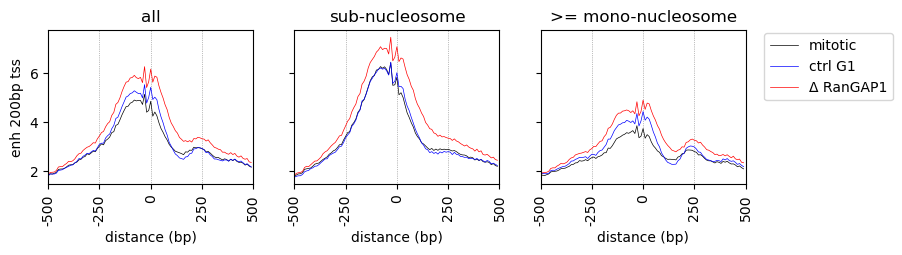

In [52]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(9,2),sharey=True)

ax1.plot(s1r,label='mitotic',color='k',lw=0.5)
ax1.plot(s2r, label = 'ctrl G1',color='blue',lw=0.5)
ax1.plot(s3r,label= 'Δ RanGAP1',color='red',lw=0.5)

ax2.plot(s4r,label='mitotic',color='k',lw=0.5)
ax2.plot(s5r, label = 'ctrl G1',color='blue',lw=0.5)
ax2.plot(s6r,label= 'Δ RanGAP1',color='red',lw=0.5)

ax3.plot(s7r,label='mitotic',color='k',lw=0.5)
ax3.plot(s8r, label = 'ctrl G1',color='blue',lw=0.5)
ax3.plot(s9r,label= 'Δ RanGAP1',color='red',lw=0.5)


for ax in ax1,ax2,ax3:
    #ax.set_yscale('log')
    #ax.set_ylim(0,0.25)
    ax.set_xlim(0,100)
    ax.set_xticks([0,25,50,75,100])
    ax.set_xticklabels([-500,-250,0,250,500],visible=True,rotation=90,ha='center')
    ax.xaxis.set_ticks_position("bottom")
    ax.grid(axis='x',color='grey', linewidth=0.5 , ls=':')
    ax.set_xlabel('distance (bp)')  
    
ax1.set_ylabel('enh 200bp tss') 
ax1.set_title('all')
ax2.set_title('sub-nucleosome')
ax3.set_title('>= mono-nucleosome')


plt.legend()
ax.legend(bbox_to_anchor=(1.75, 1.025))

#plt.savefig('.pdf',dpi=300,bbox_inches='tight')


#   F + R

In [53]:
s1=(s1f+s1r)/2
s2=(s2f+s2r)/2
s3=(s3f+s3r)/2
s4=(s4f+s4r)/2
s5=(s5f+s5r)/2
s6=(s6f+s6r)/2
s7=(s7f+s7r)/2
s8=(s8f+s8r)/2
s9=(s9f+s9r)/2


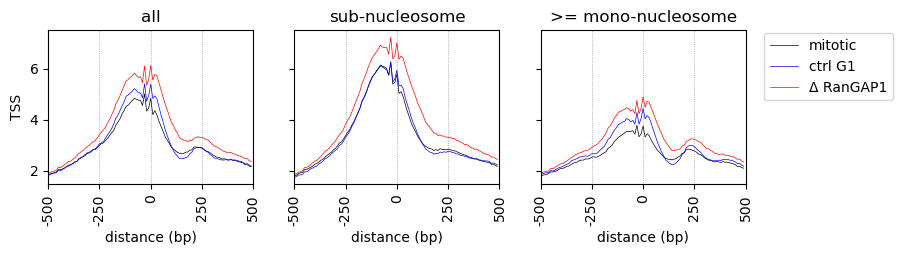

In [54]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(9,2),sharey=True)

ax1.plot(s1,label='mitotic',color='k',lw=0.5)
ax1.plot(s2, label = 'ctrl G1',color='blue',lw=0.5)
ax1.plot(s3,label= 'Δ RanGAP1',color='red',lw=0.5)

ax2.plot(s4,label='mitotic',color='k',lw=0.5)
ax2.plot(s5, label = 'ctrl G1',color='blue',lw=0.5)
ax2.plot(s6,label= 'Δ RanGAP1',color='red',lw=0.5)

ax3.plot(s7,label='mitotic',color='k',lw=0.5)
ax3.plot(s8, label = 'ctrl G1',color='blue',lw=0.5)
ax3.plot(s9,label= 'Δ RanGAP1',color='red',lw=0.5)

for ax in ax1,ax2,ax3:
    #ax.set_yscale('log')
    #ax.set_ylim(1,5.5)
    ax.set_xlim(0,100)
    ax.set_xticks([0,25,50,75,100])
    ax.set_xticklabels([-500,-250,0,250,500],visible=True,rotation=90,ha='center')
    ax.xaxis.set_ticks_position("bottom")
    ax.grid(axis='x',color='grey', linewidth=0.5 , ls=':')
    ax.set_xlabel('distance (bp)')  
    
ax1.set_ylabel('TSS') 
ax1.set_title('all')
ax2.set_title('sub-nucleosome')
ax3.set_title('>= mono-nucleosome')


plt.legend()
ax.legend(bbox_to_anchor=(1.75, 1.025))

#plt.savefig('.pdf',dpi=300,bbox_inches='tight')
